## Getting the documents where the ruler is on the top

In [8]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

########################
#This section just to get the array that we want

ruler_tb = []
ruler_lr = []

rootDir = '../ResizedSS4/'

# Create the directory for the outputs
path = "../Outputs/Margins/"

try:
    os.mkdir(path)
except OSError:
    print ("Creation of the directory %s failed" % path)
else:
    print ("Successfully created the directory %s " % path)

for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        file_name = fname.split(".")
        #print('\t%s' % file_name[0])
        
        bin_sig3 = []
        peaks = []
        p = []
        
        #reading the file
        image = cv2.imread(dirName + '/' + fname)
        
        #Converting to greyscale
        gry = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        sig = np.sum(gry, axis=1)
        
        #get threshold values
        minV = min(sig)
        
        ran = max(sig) - min(sig)
        ran_threshold = 0.2
        
        #Check for peaks, form binary signal, store pixel values for peak and append to peaks.
        for n in range(len(sig)):
            if sig[n] > minV + ran_threshold*ran:
                bin_sig3.append(5000)
                p.append(n)
            else:
                if n < len(sig) - 3:
                    if sig[n+3] > minV + ran_threshold*ran:
                        bin_sig3.append(5000)
                        p.append(n)
                    else:
                        bin_sig3.append(0)
                        if len(p) != 0:
                            peaks.append(p)
                            p = []
                        else:
                            continue
                else:
                    bin_sig3.append(0)
                    if len(p) != 0:
                        peaks.append(p)
                        p = []
                    else:
                        continue
        
        if len(peaks)!=2:
            ruler_lr.append(file_name[0])
        else:
            data = [file_name[0],peaks]
            ruler_tb.append(data)

##########################

Creation of the directory ../Outputs/Margins/ failed
Found directory: ../ResizedSS4/


In [9]:
print(ruler_tb)

[['RE94_20_0066', [[41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139], [166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 27

## Margin Extraction

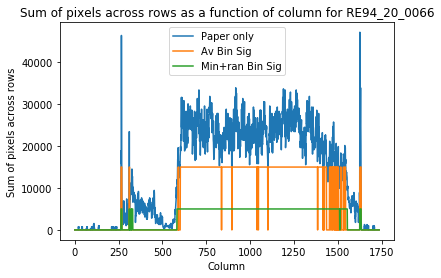

[268, 1103]
166 1091
(925, 835, 3)
Sucessful save


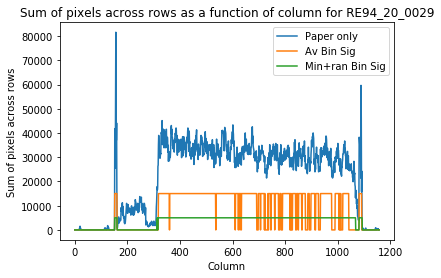

[160, 361]
155 1648
(1493, 201, 3)
Sucessful save


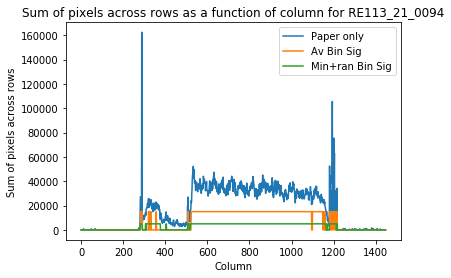

[290, 523]
506 2010
(1504, 233, 3)
Sucessful save


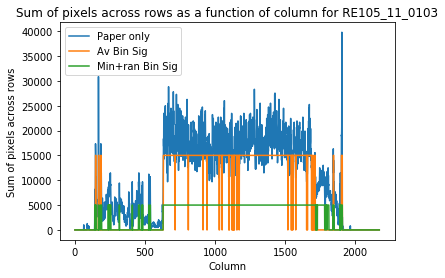

[149, 1173]
382 1276
(894, 1024, 3)
Sucessful save


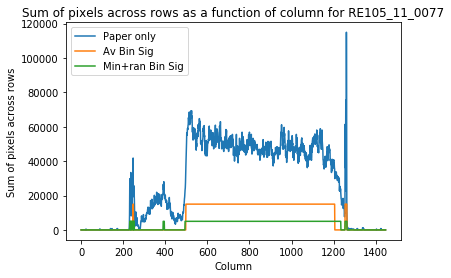

[248, 498]
324 1989
(1665, 250, 3)
Sucessful save


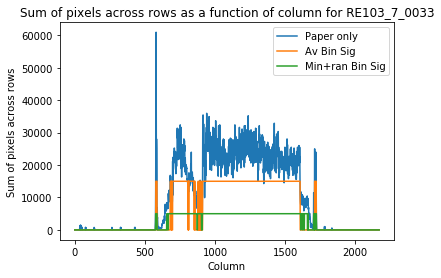

[586, 912]
333 1211
(878, 326, 3)
Sucessful save


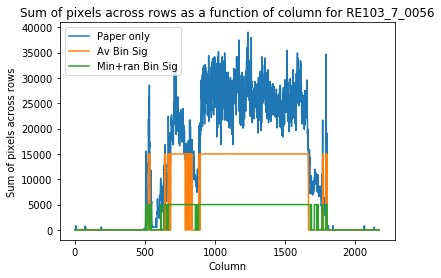

[535, 894]
306 1268
(962, 359, 3)
Sucessful save


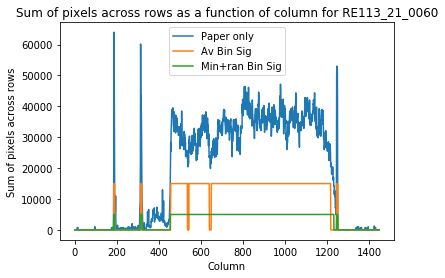

[189, 649]
770 1664
(894, 460, 3)
Sucessful save


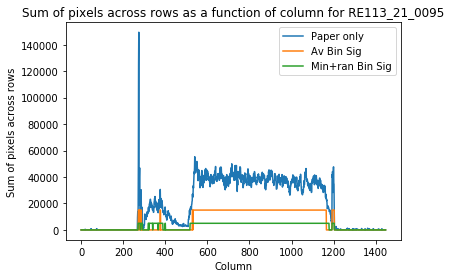

[275, 532]
494 2007
(1513, 257, 3)
Sucessful save


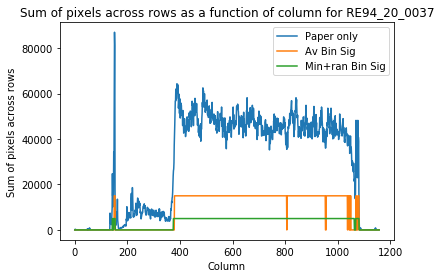

[153, 379]
156 1670
(1514, 226, 3)
Sucessful save


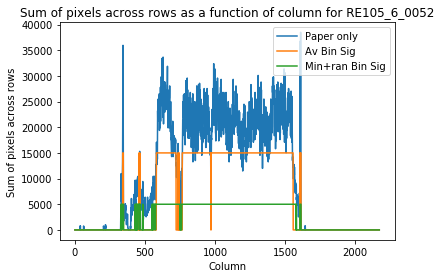

[345, 972]
592 1256
(664, 627, 3)
Sucessful save


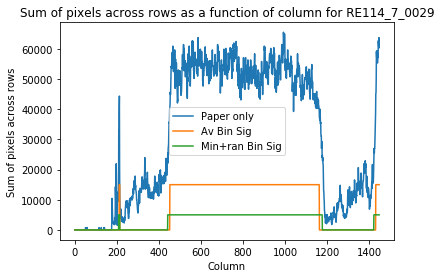

[213, 452]
298 1922
(1624, 239, 3)
Sucessful save


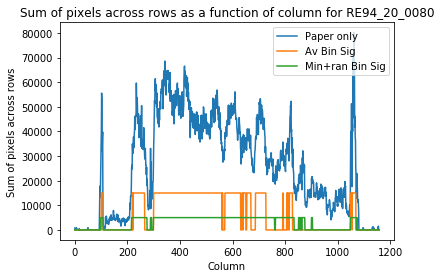

[107, 300]
159 1688
(1529, 193, 3)
Sucessful save


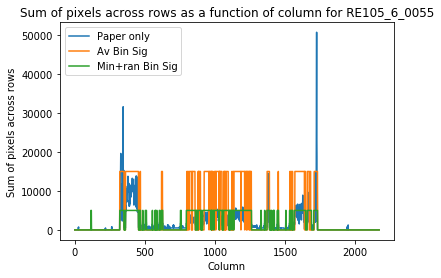

[351, 362]
571 1298
(727, 11, 3)
Sucessful save


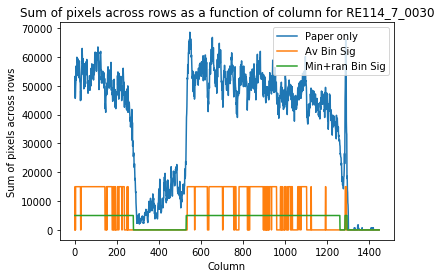

[2, 30]
297 1920
(1623, 28, 3)
Sucessful save


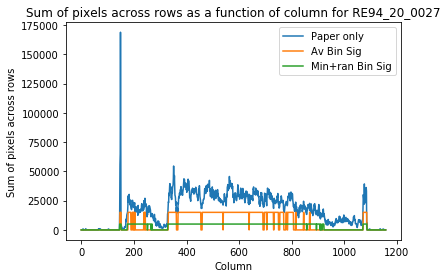

[151, 540]
148 1642
(1494, 389, 3)
Sucessful save


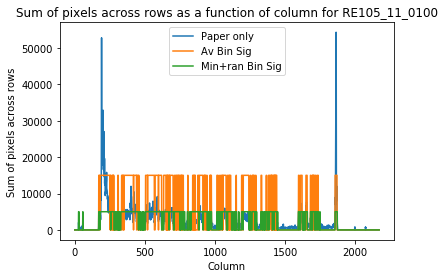

[176, 180]
392 1275
(883, 4, 3)
Sucessful save


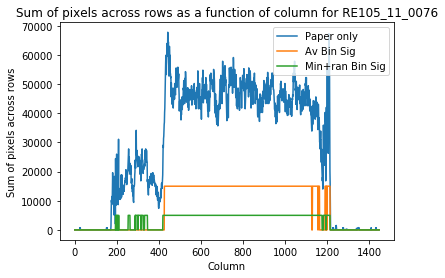

[426, 1126]
346 1992
(1646, 700, 3)
Sucessful save


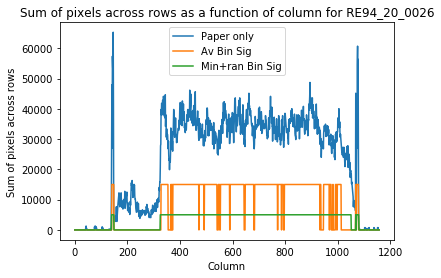

[148, 797]
168 1664
(1496, 649, 3)
Sucessful save


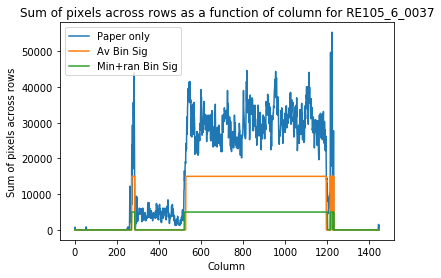

[285, 528]
457 2013
(1556, 243, 3)
Sucessful save


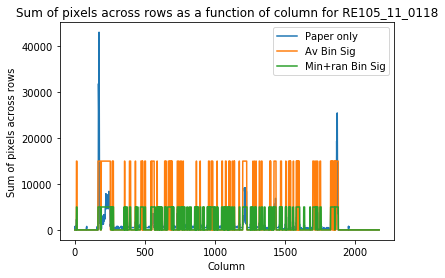

[15, 189]
392 1306
(914, 174, 3)
Sucessful save


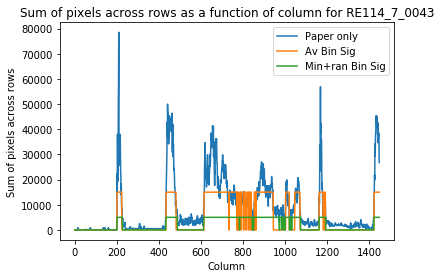

[223, 615]
281 1883
(1602, 392, 3)
Sucessful save


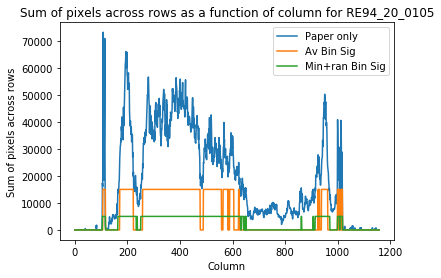

[116, 258]
170 1664
(1494, 142, 3)
Sucessful save


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [10]:
##########################
# Prototype code for margin detection

margins = []

for x in range(len(ruler_tb)):
    
    bin_sig = []
    bin_sig3 = []
    
    # Get variables
    peaks = ruler_tb[x][1]
    filename = ruler_tb[x][0]
    
    # Check if the ruler is on the top or the bottom
    if len(ruler_tb[x][1][1]) > len(ruler_tb[x][1][0]):
        index = 1
    else:
        index = 0
        
    first_row = ruler_tb[x][1][index][1]
    last_row = ruler_tb[x][1][index][len(ruler_tb)-1]
    page = ruler_tb[x][1][index]
    
#    print(peak)
    
    # Edge detection
    img = cv2.imread(rootDir + '/' + filename + '.jpg')
    gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gry,100,200)
    
    # Sum over columns to get a signal in the horizontal direction
    sig = np.sum(edges[page], axis=0)
#    print(sig[300])
    
    sig2 = np.sum(edges, axis=0)
        
    av = sum(sig)/len(sig)
    av_threshold = 1.3

    ran = max(sig) - min(sig)
    ran_threshold = 0.8

    p = []
    pA = []
    
    for n in range(len(sig)):
        if sig[n] > av_threshold*av:
            bin_sig.append(15000)
            p.append(n)
        elif sig[n-1] > av_threshold*av and n != 0:
            bin_sig.append(15000)
            p.append(n)
        else:
            bin_sig.append(0)
            if len(p) != 0:
                pA.append(p)
                p = []

    for n in range(len(sig)):
        if sig[n] > ran_threshold*av:
            bin_sig3.append(5000)
        elif sig[n-1] > ran_threshold*av and n != 0:
            bin_sig3.append(5000)
        else:
            bin_sig3.append(0)
            
    # Plotting 
    plt.plot(sig, label='Paper only')
    plt.plot(bin_sig, label='Av Bin Sig')
    plt.plot(bin_sig3, label='Min+ran Bin Sig')
    plt.ylabel('Sum of pixels across rows')
    plt.xlabel('Column')
    plt.legend()
    plt.title('Sum of pixels across rows as a function of column for ' + filename)
    #plt.savefig('../Outputs/Plots/margin_threshold_test/' + filename + '.svg')
    plt.show()
    
    ### Catching the margin
    index = 0
    for x in range(0, len(pA)):
        if len(pA[x]) > len(pA[index]):
            index = x
            
    if index == 0:
        margin = [pA[0][0], pA[index][len(pA[0])-1]]
        margins.append(margin)
    else:
        margin = [pA[0][len(pA[0])-1], pA[index][0]]
        margins.append(margin)

    print(margin)
    print(page[0], page[len(page)-1])
    
    # Crop the image
    imgCrop = img[page[0]:page[len(page)-1],margin[0]:margin[1]]
    print(imgCrop.shape)
    
    cv2.imwrite(path + filename + '.jpg', imgCrop)
    print('Sucessful save')